How many positive and negative reviews are there in the IMDB movie reviews dataset?

In [1]:
import pandas as pd

movies = pd.read_csv('datasets/IMDB_sample.csv', index_col=None)

print(movies.head())

   Unnamed: 0                                             review  label
0       18245  This short spoof can be found on Elite's Mille...      0
1       19801  A singularly unfunny musical comedy that artif...      0
2        3222  An excellent series, masterfully acted and dir...      1
3        6010  The master of movie spectacle Cecil B. De Mill...      1
4       16355  I was gifted with this movie as it had such a ...      0


In [2]:
# Find the number of positive and negative reviews
print('Number of positive and negative reviews: ', movies.label.value_counts())

# Find the proportion of positive and negative reviews
print('Proportion of positive and negative reviews: ', movies.label.value_counts() / len(movies))

Number of positive and negative reviews:  0    3782
1    3719
Name: label, dtype: int64
Proportion of positive and negative reviews:  0    0.504199
1    0.495801
Name: label, dtype: float64


In [3]:
# Find the longest review in the review column of movies
length_reviews = movies.review.str.len()

# How long is the longest review
print(max(length_reviews))

10321


In [4]:
# Find the shortest review in the review column of movies
print(min(length_reviews))

52


Detect the sentiment from strings

In [5]:
two_cities = open('datasets/two_cities.txt', 'r').read()

In [6]:
print(two_cities)

It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way – in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only.


In [7]:
from textblob import TextBlob

#Create a textblob object
blob_two_cities = TextBlob(two_cities)

# Print out the sentiment 
print(blob_two_cities.sentiment)

Sentiment(polarity=0.022916666666666658, subjectivity=0.5895833333333332)


In [8]:
annak = open('datasets/annak.txt', 'r').read()

catcher = open('datasets/catcher.txt', 'r').read()

# Create a textblob object 
blob_annak = TextBlob(annak)
blob_catcher = TextBlob(catcher)

# Print out the sentiment   
print('Sentiment of annak: ', blob_annak.sentiment)
print('Sentiment of catcher: ', blob_catcher.sentiment)

Sentiment of annak:  Sentiment(polarity=0.05000000000000002, subjectivity=0.95)
Sentiment of catcher:  Sentiment(polarity=-0.05, subjectivity=0.5466666666666666)


In [9]:
titanic_review = open('datasets/titanic_review.txt', 'r').read()

In [10]:
# Create a textblob object  
blob_titanic = TextBlob(titanic_review)

# Print out its sentiment  
print(blob_titanic.sentiment)


Sentiment(polarity=0.2024748060772906, subjectivity=0.4518248900857597)


Building a word cloud

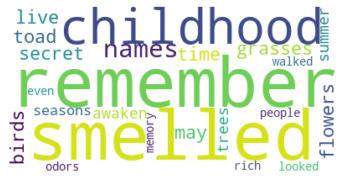

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

east_of_eden = open('datasets/east_of_eden.txt', 'r').read()

# Generate the word cloud from the east_of_eden string
cloud_east_of_eden = WordCloud(background_color="white").generate(east_of_eden)

# Create a figure of the generated cloud
plt.imshow(cloud_east_of_eden, interpolation='bilinear')  
plt.axis('off')
# Display the figure
plt.show()

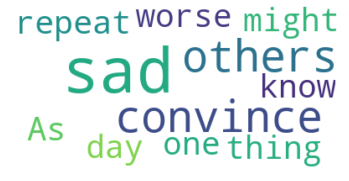

In [12]:
#string
illuminated = 'I am not sad, he would repeat to himself over and over, I am not sad. As if he might one day convince himself or convince others -- the only thing worse than being sad is for others to know that you are sad. I am not sad.'

#create cloud
cloud_illuminated = WordCloud(background_color='white').generate(illuminated)

#display cloud
plt.imshow(cloud_illuminated, interpolation='bilinear')
plt.axis('off')

plt.show()

In [13]:
# build a wordcloud from the top 100 positive reviews in movies
descriptions = open('datasets/descriptions.txt', 'r').read()

# movie-specific set of stopwordss from stop_words.py file
import sys
from my_stopwords import my_stopwords


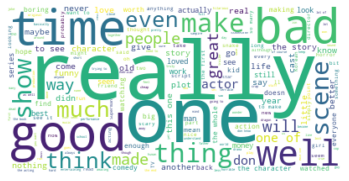

In [14]:
# Create and generate a word cloud image 

my_cloud = WordCloud(background_color='white', stopwords=my_stopwords).generate(descriptions)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

Learning Bag-of-words

In [15]:
# Import the required function
from sklearn.feature_extraction.text import CountVectorizer

annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']

# Build the vectorizer and fit it
anna_vect = CountVectorizer()
anna_vect.fit(annak)

# Create the bow representation
anna_bow = anna_vect.transform(annak)

# Print the bag-of-words result 
print(anna_bow.toarray())

[[1 1 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 1 1 1 2 1]]


In [16]:
# import amazon reviews as reviews
reviews = pd.read_csv('datasets/amazon_reviews_sample.csv')

In [17]:
# create BOW from reviews
# Build the vectorizer, specify max features 
vect = CountVectorizer(max_features=100)
# Fit the vectorizer
vect.fit(reviews.review)

# Transform the review column
X_review = vect.transform(reviews.review)

# Create the bow representation
X_df=pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   about  after  all  also  am  an  and  any  are  as  ...  what  when  which  \
0      0      0    1     0   0   0    2    0    0   0  ...     0     0      0   
1      0      0    0     0   0   0    3    1    1   0  ...     0     0      0   
2      0      0    3     0   0   1    4    0    1   1  ...     0     0      1   
3      0      0    0     0   0   0    9    0    1   0  ...     0     0      0   
4      0      1    0     0   0   0    3    0    1   0  ...     0     0      0   

   who  will  with  work  would  you  your  
0    2     0     1     0      2    0     1  
1    0     0     0     0      1    1     0  
2    1     0     0     1      1    2     0  
3    0     0     0     0      0    0     0  
4    0     0     0     0      0    3     1  

[5 rows x 100 columns]


In [18]:
# Specify token sequence length in BOW of reviews
# Build the vectorizer, specify token sequence and fit
vect1 = CountVectorizer(ngram_range=(1, 2))
vect1.fit(reviews.review)

# Transform the review column
X_review1 = vect1.transform(reviews.review)

# Create the bow representation
X_df1 = pd.DataFrame(X_review1.toarray(), columns=vect1.get_feature_names())
print(X_df1.head())

   00  00 and  00 apiece  00 as  00 back  00 bad  00 bucks  00 cheaper  00 do  \
0   0       0          0      0        0       0         0           0      0   
1   0       0          0      0        0       0         0           0      0   
2   0       0          0      0        0       0         0           0      0   
3   0       0          0      0        0       0         0           0      0   
4   0       0          0      0        0       0         0           0      0   

   00 does  ...  étai fidèle  était  était pas  étre  étre publié  éviter  \
0        0  ...            0      0          0     0            0       0   
1        0  ...            0      0          0     0            0       0   
2        0  ...            0      0          0     0            0       0   
3        0  ...            0      0          0     0            0       0   
4        0  ...            0      0          0     0            0       0   

   última  última parte  única  única opción  
0  

In [19]:
# size of vocabulary of movies reviews refer to movies from IMDB dataset

# limit size of vocabulary to 100
# Build the vectorizer, specify size of vocabulary and fit
vect = CountVectorizer(max_features=100)
vect.fit(movies.review)

# Transform the review column
X_review = vect.transform(movies.review)
# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   about  after  all  also  an  and  any  are  as  at  ...  well  were  what  \
0      0      0    0     0   0    1    0    0   2   0  ...     0     0     0   
1      0      0    3     1   1   11    0    3   3   4  ...     0     0     1   
2      0      1    0     0   1    7    0    1   2   1  ...     0     0     0   
3      0      0    0     0   2    1    0    1   2   2  ...     1     0     0   
4      0      0    3     0   0    8    0    3   1   0  ...     2     1     0   

   when  which  who  will  with  would  you  
0     0      0    0     0     1      1    0  
1     1      2    0     2     7      2    3  
2     0      0    0     0     2      0    0  
3     0      0    1     0     0      0    1  
4     1      1    0     0     2      0    0  

[5 rows x 100 columns]


In [20]:
# limit size of vocabulary to include terms which occur in no more than 200 documents
# Build and fit the vectorizer
vect = CountVectorizer(max_df=200)
vect.fit(movies.review)

# Transform the review column
X_review = vect.transform(movies.review)
# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   00  000  000s  007  0080  0083  0093638  00am  00pm  00s  ...  zukovic  \
0   0    0     0    0     0     0        0     0     0    0  ...        0   
1   0    0     0    0     0     0        0     0     0    0  ...        0   
2   0    0     0    0     0     0        0     0     0    0  ...        0   
3   0    0     0    0     0     0        0     0     0    0  ...        0   
4   0    0     0    0     0     0        0     0     0    0  ...        0   

   zulu  zuniga  zvyagvatsev  zwick  zx81  zy  zzzzzzzzzzzz  zzzzzzzzzzzzz  â½  
0     0       0            0      0     0   0             0              0   0  
1     0       0            0      0     0   0             0              0   0  
2     0       0            0      0     0   0             0              0   0  
3     0       0            0      0     0   0             0              0   0  
4     0       0            0      0     0   0             0              0   0  

[5 rows x 45055 columns]


In [21]:
# limit size of vocabulary to ignore terms which occur in less than 50 documents
# Build and fit the vectorizer
vect = CountVectorizer(min_df=50)
vect.fit(movies.review)

# Transform the review column
X_review = vect.transform(movies.review)
# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   000  10  100  11  12  13  14  15  1950  1980  ...  york  you  young  \
0    0   0    0   0   0   0   0   0     0     0  ...     0    0      0   
1    0   1    0   0   0   0   0   0     0     0  ...     0    3      0   
2    0   0    0   0   0   0   0   0     0     0  ...     0    0      1   
3    0   0    0   0   0   0   0   0     0     0  ...     0    1      1   
4    0   1    0   0   0   0   0   0     0     0  ...     0    0      0   

   younger  your  yourself  youth  zero  zombie  zombies  
0        0     0         0      0     0       0        1  
1        0     2         0      0     0       0        0  
2        0     0         0      0     0       0        0  
3        0     0         0      0     0       0        0  
4        1     0         0      0     0       0        0  

[5 rows x 2552 columns]


In [22]:
# using reviews to build another BOW with n-grams and vocabulary size
# Build the vectorizer and make sure to specify the following parameters: 
# the size of the vocabulary should be limited to 1000, 
# include only bigrams, 
# and ignore terms that appear in more than 500 documents.

# Build the vectorizer, specify max features and fit
vect = CountVectorizer(max_features=1000, ngram_range=(2, 2), max_df=500)
vect.fit(reviews.review)

# Transform the review
X_review = vect.transform(reviews.review)

# Create a DataFrame from the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   able to  about how  about it  about the  about this  after reading  \
0        0          0         0          0           0              0   
1        0          0         0          0           0              0   
2        0          0         0          0           0              0   
3        0          0         0          0           0              0   
4        0          0         0          0           0              0   

   after the  again and  ago and  agree with  ...  you think  you to  you ve  \
0          0          0        0           0  ...          0       0       0   
1          0          0        0           0  ...          0       0       0   
2          0          0        0           0  ...          0       0       2   
3          0          0        0           0  ...          0       0       0   
4          0          0        0           0  ...          0       0       1   

   you want  you will  you won  you would  your money  your own  your time  
0  

In [23]:
# Tokenize a string GoT (quote from Game of Thrones)

# import the required function
from nltk import word_tokenize

# read in GoT as string
GoT = open('datasets/GoT.txt', 'r').read()

# Transform the GoT string to word tokens
print(word_tokenize(GoT))

['Never', 'forget', 'what', 'you', 'are', ',', 'for', 'surely', 'the', 'world', 'will', 'not', '.', 'Make', 'it', 'your', 'strength', '.', 'Then', 'it', 'can', 'never', 'be', 'your', 'weakness', '.', 'Armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'used', 'to', 'hurt', 'you', '.']


In [24]:
# word tokens from list avengers

# import in avengers
from avengers import avengers

# Tokenize each item in the avengers 
tokens_avengers = [word_tokenize(item) for item in avengers]

print(tokens_avengers)

[['Cause', 'if', 'we', 'ca', "n't", 'protect', 'the', 'Earth', ',', 'you', 'can', 'be', 'd', '*', '*', '*', 'sure', 'we', "'ll", 'avenge', 'it'], ['There', 'was', 'an', 'idea', 'to', 'bring', 'together', 'a', 'group', 'of', 'remarkable', 'people', ',', 'to', 'see', 'if', 'we', 'could', 'become', 'something', 'more'], ['These', 'guys', 'come', 'from', 'legend', ',', 'Captain', '.', 'They', "'re", 'basically', 'Gods', '.']]


In [25]:
# tokenize a feature of the length of a review from reviews

# Tokenize each item in the review column 
word_tokens = [word_tokenize(review) for review in reviews.review]

# Print out the first item of the word_tokens list
print(word_tokens[0])

# Create an empty list to store the length of reviews
len_tokens = []

# Iterate over the word_tokens list and determine the length of each item
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))

# Create a new feature for the lengh of each review
reviews['n_words'] = len_tokens 

['Stuning', 'even', 'for', 'the', 'non-gamer', ':', 'This', 'sound', 'track', 'was', 'beautiful', '!', 'It', 'paints', 'the', 'senery', 'in', 'your', 'mind', 'so', 'well', 'I', 'would', 'recomend', 'it', 'even', 'to', 'people', 'who', 'hate', 'vid', '.', 'game', 'music', '!', 'I', 'have', 'played', 'the', 'game', 'Chrono', 'Cross', 'but', 'out', 'of', 'all', 'of', 'the', 'games', 'I', 'have', 'ever', 'played', 'it', 'has', 'the', 'best', 'music', '!', 'It', 'backs', 'away', 'from', 'crude', 'keyboarding', 'and', 'takes', 'a', 'fresher', 'step', 'with', 'grate', 'guitars', 'and', 'soulful', 'orchestras', '.', 'It', 'would', 'impress', 'anyone', 'who', 'cares', 'to', 'listen', '!', '^_^']


Guessing the language

In [26]:
# identify the language of a string

# Import the language detection function and package
from langdetect import detect_langs




In [27]:
# detect language from list of strings

sentences = ['La histoire rendu étai fidèle, excellent, et grand.', 'Excelente muy recomendable.', 'It had a leak from day one but the return and exchange process was very quick.']


from langdetect import detect_langs

languages = []

# Loop over the sentences in the list and detect their language
for sentence in range(len(sentences)):
    languages.append(detect_langs(sentences[sentence]))
    
print('The detected languages are: ', languages)

The detected languages are:  [[fr:0.9999948704262067], [es:0.9999942847010895], [en:0.9999977675671744]]


Generating stop words

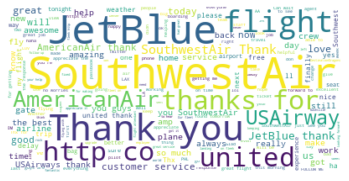

In [28]:
# Generating word cloud of tweets 

# read in text_tweet.txt
text_tweet = open('datasets/text_tweet.txt', 'r').read()

# build word cloud without using stop words

# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white').generate(text_tweet)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()


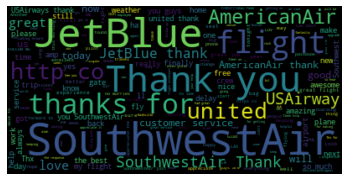

In [29]:
# build word cloud with set STOPWORDS

# Import the word cloud function and stop words list
from wordcloud import STOPWORDS 

# Define and update the list of stopwords
my_stop_words = STOPWORDS.update(['airline', 'airplane'])

# Create and generate a word cloud image
my_cloud = WordCloud(stopwords=my_stop_words).generate(text_tweet)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")
# Don't forget to show the final image
plt.show()

In [30]:
# Import the stop words
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

tweets = pd.read_csv('datasets/Tweets.csv')

# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@'])

# Build and fit the vectorizer
vect = CountVectorizer(stop_words=my_stop_words)
vect.fit(tweets.text)

# Create the bow representation
X_review = vect.transform(tweets.text)
# Create the data frame
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   00  000  000114  000419  000ft  000lbs  0011  0016  00a  00am  ...  \
0   0    0       0       0      0       0     0     0    0     0  ...   
1   0    0       0       0      0       0     0     0    0     0  ...   
2   0    0       0       0      0       0     0     0    0     0  ...   
3   0    0       0       0      0       0     0     0    0     0  ...   
4   0    0       0       0      0       0     0     0    0     0  ...   

   zrh_airport  zsdgzydnde  zsuztnaijq  ztrdwv0n4l  zukes  zurich  zv2pt6trk9  \
0            0           0           0           0      0       0           0   
1            0           0           0           0      0       0           0   
2            0           0           0           0      0       0           0   
3            0           0           0           0      0       0           0   
4            0           0           0           0      0       0           0   

   zv6cfpohl5  zvfmxnuelj  zzps5ywve2  
0           0           0         

In [31]:
# Multiple text columns

# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@', 'am', 'pm'])

tweets = tweets.dropna()

# Build and fit the vectorizers
vect1 = CountVectorizer(stop_words=my_stop_words)
vect2 = CountVectorizer(stop_words=ENGLISH_STOP_WORDS) 
vect1.fit(tweets.text)
vect2.fit(tweets.negativereason)

# Print the last 15 features from the first, and all from second vectorizer
print(vect1.get_feature_names()[-15:])
print(vect2.get_feature_names())

['away', 'cancelled', 'doubt', 'flight', 'flighted', 'gate', 'home', 'inside', 'offer', 'seriously', 'sitting', 'stranded', 'united', 'usairways', 'work']
['cancelled', 'flight', 'late']


In [32]:
# specify token pattern in tweets

tweets = pd.read_csv('datasets/Tweets.csv')

# Build and fit the vectorizer
vect = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]').fit(tweets.text)
vect.transform(tweets.text)
print('Length of vectorizer: ', len(vect.get_feature_names()))

# Build the first vectorizer
vect1 = CountVectorizer().fit(tweets.text)
vect1.transform(tweets.text)

# Build the second vectorizer
vect2 = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]').fit(tweets.text)
vect2.transform(tweets.text)

# Print out the length of each vectorizer
print('Length of vectorizer 1: ', len(vect1.get_feature_names()))
print('Length of vectorizer 2: ', len(vect2.get_feature_names()))


Length of vectorizer:  643
Length of vectorizer 1:  15051
Length of vectorizer 2:  643


In [33]:
# Import the word tokenizing package
from nltk import word_tokenize

# Tokenize the text column
word_tokens = [word_tokenize(review) for review in tweets.text]
print('Original tokens: ', word_tokens[0])

# Filter out non-letter characters
cleaned_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]
print('Cleaned tokens: ', cleaned_tokens[0])

Original tokens:  ['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.']
Cleaned tokens:  ['VirginAmerica', 'What', 'dhepburn', 'said']


In [34]:
# More string operators and Twitter

tweets_list = ["@VirginAmerica it's really aggressive to blast obnoxious 'entertainment' in your guests' faces &amp; they have little recourse", "@VirginAmerica Hey, first time flyer next week - excited! But I'm having a hard time getting my flights added to my Elevate account. Help?", '@united Change made in just over 3 hours. For something that should have taken seconds online, I am not thrilled. Loved the agent, though.']

# Create a list of lists, containing the tokens from list_tweets
tokens = [word_tokenize(item) for item in tweets_list]

# Remove characters and digits , i.e. retain only letters
letters = [[word for word in item if word.isalpha()] for item in tokens]
# Remove characters, i.e. retain only letters and digits
let_digits = [[word for word in item if word.isalnum()] for item in tokens]
# Remove letters and characters, retain only digits
digits = [[word for word in item if word.isdigit()] for item in tokens]

# Print the last item in each list
print('Last item in alphabetic list: ', letters[2])
print('Last item in list of alphanumerics: ', let_digits[2])
print('Last item in the list of digits: ', digits[2])

Last item in alphabetic list:  ['united', 'Change', 'made', 'in', 'just', 'over', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in list of alphanumerics:  ['united', 'Change', 'made', 'in', 'just', 'over', '3', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in the list of digits:  ['3']


In [46]:
# Import the required packages from nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize

porter = PorterStemmer()
WNlemmatizer = WordNetLemmatizer()

# Tokenize the GoT string
tokens = word_tokenize(GoT) 

In [50]:
import time

# Log the start time
start_time = time.time()

# Build a stemmed list
stemmed_tokens = [porter.stem(token) for token in tokens] 

# Log the end time
end_time = time.time()

print('Time taken for stemming in seconds: ', end_time - start_time)
print('Stemmed tokens: ', stemmed_tokens) 

Time taken for stemming in seconds:  0.0008347034454345703
Stemmed tokens:  ['never', 'forget', 'what', 'you', 'are', ',', 'for', 'sure', 'the', 'world', 'will', 'not', '.', 'make', 'it', 'your', 'strength', '.', 'then', 'it', 'can', 'never', 'be', 'your', 'weak', '.', 'armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'use', 'to', 'hurt', 'you', '.']


In [54]:
# Import the function to perform stemming
from nltk.stem import PorterStemmer
from nltk import word_tokenize

# Call the stemmer
porter = PorterStemmer()

# Transform the array of tweets to tokens
tokens = [word_tokenize(tweets) for tweets in tweets] 
# Stem the list of tokens
stemmed_tokens = [[porter.stem(word) for word in tweet] for tweet in tokens] 
# Print the first element of the list
print(stemmed_tokens[0])

['tweet_id']


In [55]:
# Import the required function
from sklearn.feature_extraction.text import TfidfVectorizer

annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']

# Call the vectorizer and fit it
anna_vect = TfidfVectorizer().fit(annak)

# Create the tfidf representation
anna_tfidf = anna_vect.transform(annak)

# Print the result 
print(anna_tfidf.toarray())

[[0.4472136  0.4472136  0.4472136  0.         0.4472136  0.
  0.4472136  0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.30151134 0.         0.30151134
  0.         0.30151134 0.30151134 0.30151134 0.30151134 0.60302269
  0.30151134]]


In [56]:
# Import the required vectorizer package and stop words list
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

# Define the vectorizer and specify the arguments
my_pattern = r'\b[^\d\W][^\d\W]+\b'
vect = TfidfVectorizer(ngram_range=(1, 2), max_features=100, token_pattern=my_pattern, stop_words=ENGLISH_STOP_WORDS).fit(tweets.text)

# Transform the vectorizer
X_txt = vect.transform(tweets.text)

# Transform to a data frame and specify the column names
X=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names())
print('Top 5 rows of the DataFrame: ', X.head())

Top 5 rows of the DataFrame:      aa  agent  airline  airport  americanair       amp  bag  baggage  bags  \
0  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   
1  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   
2  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   
3  0.0    0.0      0.0      0.0          0.0  0.537247  0.0      0.0   0.0   
4  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   

   cancelled  ...        ve  virginamerica  wait  waiting  want  way  weather  \
0        0.0  ...  0.000000       1.000000   0.0      0.0   0.0  0.0      0.0   
1        0.0  ...  0.544485       0.531770   0.0      0.0   0.0  0.0      0.0   
2        0.0  ...  0.000000       0.407271   0.0      0.0   0.0  0.0      0.0   
3        0.0  ...  0.000000       0.559828   0.0      0.0   0.0  0.0      0.0   
4        0.0  ...  0.000000       0.663756   0.0      0.0   0.0  0.0      0.0   

   work  worst

In [57]:
# Import the required packages
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Build a BOW and tfidf vectorizers from the review column and with max of 100 features
vect1 = CountVectorizer(max_features=100).fit(reviews.review)
vect2 = TfidfVectorizer(max_features=100).fit(reviews.review)

# Transform the vectorizers
X1 = vect1.transform(reviews.review)
X2 = vect2.transform(reviews.review)
# Create DataFrames from the vectorizers 
X_df1 = pd.DataFrame(X1.toarray(), columns=vect1.get_feature_names())
X_df2 = pd.DataFrame(X2.toarray(), columns=vect2.get_feature_names())
print('Top 5 rows using BOW: \n', X_df1.head())
print('Top 5 rows using tfidf: \n', X_df2.head())

Top 5 rows using BOW: 
    about  after  all  also  am  an  and  any  are  as  ...  what  when  which  \
0      0      0    1     0   0   0    2    0    0   0  ...     0     0      0   
1      0      0    0     0   0   0    3    1    1   0  ...     0     0      0   
2      0      0    3     0   0   1    4    0    1   1  ...     0     0      1   
3      0      0    0     0   0   0    9    0    1   0  ...     0     0      0   
4      0      1    0     0   0   0    3    0    1   0  ...     0     0      0   

   who  will  with  work  would  you  your  
0    2     0     1     0      2    0     1  
1    0     0     0     0      1    1     0  
2    1     0     0     1      1    2     0  
3    0     0     0     0      0    0     0  
4    0     0     0     0      0    3     1  

[5 rows x 100 columns]
Top 5 rows using tfidf: 
    about     after       all  also   am       an       and       any  \
0    0.0  0.000000  0.138970   0.0  0.0  0.00000  0.140823  0.000000   
1    0.0  0.000000  0.000